In [1]:
from lxml import etree
import pandas as pd
from collections import Counter
import os
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


wdir = "../../../resulting data/"


In [2]:
verses_features = pd.read_parquet(wdir +  "verses_features.parquet")

In [3]:
verses_features

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31060,b.REV.022.017,REV,022,REV.022,apocalyptic,8693,4633,4060,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31061,b.REV.022.018,REV,022,REV.022,apocalyptic,4396,1939,2457,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31062,b.REV.022.019,REV,022,REV.022,apocalyptic,3947,1952,1995,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31063,b.REV.022.020,REV,022,REV.022,apocalyptic,11981,6014,5967,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
verses_features.head()

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sexual_categories = verses_features.columns.tolist()[8:262]

In [7]:
structural_categories = [column for column in verses_features.columns.tolist() if "number " in column]

In [8]:
entitiy_categories = [column for column in verses_features.columns.tolist() if "#" in column]

In [9]:
verses_features.fillna(0, inplace=True)

In [10]:
verses_features.head()

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


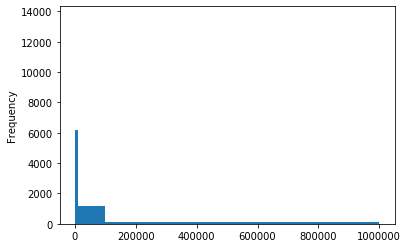

In [11]:
verses_features["twitter_freq_sum_2014_2015"].plot.hist(bins= [0,1,10,100,1000,10000,100000,1000000], )

In [12]:
verses_features[["twitter_freq_sum_2014_2015"] + structural_categories].corr( ).sort_values(by="twitter_freq_sum_2014_2015")

,twitter_freq_sum_2014_2015,number of entities referred,number of different entities referred,number of people,number of different number of people,number of groups,number of different number of groups,number of places,number of different number of places,number of times,...,number of entities receiving communication,number of different entities receiving communication,number of oral quotations,number of dream quotations,number of praying quotations,number of oath quotations,number of written quotations,number of song quotations,number of soCalled quotations,number of idea quotations
number of different entities referred,-0.103707,0.859930,1.000000,0.605132,0.666531,0.488951,0.566156,0.464629,0.500096,0.042301,...,0.418575,0.416926,0.368510,0.012351,-0.035059,0.032121,0.038097,0.016282,0.039803,0.167310
number of entities referred,-0.102419,1.000000,0.859930,0.753656,0.595672,0.586278,0.490508,0.419571,0.396643,0.038494,...,0.533169,0.477114,0.503143,0.011820,-0.037495,0.035121,0.018882,0.002301,0.087916,0.324358
number of different number of places,-0.072671,0.396643,0.500096,0.028951,-0.012240,0.080354,0.101490,0.934344,1.000000,-0.005298,...,-0.009554,-0.042421,0.014958,-0.007089,-0.055597,0.009261,-0.031798,-0.005441,-0.011390,0.027101
number of places,-0.071011,0.419571,0.464629,0.030337,-0.014364,0.077779,0.094890,1.000000,0.934344,-0.008816,...,0.014581,-0.023684,0.037133,-0.008843,-0.056333,0.008596,-0.030993,-0.006652,-0.009804,0.055754
number of different number of people,-0.066781,0.595672,0.666531,0.849910,1.000000,-0.011552,-0.028285,-0.014364,-0.012240,-0.028754,...,0.353297,0.381362,0.267640,0.034901,0.058396,0.021536,-0.017255,0.016489,-0.007418,0.101501
number of people,-0.066641,0.753656,0.605132,1.000000,0.849910,0.052985,0.014744,0.030337,0.028951,-0.018329,...,0.440561,0.424175,0.391977,0.031522,0.039528,0.030185,-0.022440,0.002409,0.013764,0.254591
number of oral quotations,-0.064547,0.503143,0.368510,0.391977,0.267640,0.401486,0.330430,0.037133,0.014958,0.003321,...,0.825830,0.765838,1.000000,-0.020765,-0.191196,-0.006107,-0.052776,-0.061653,0.031969,0.382463
number of groups,-0.056110,0.586278,0.488951,0.052985,-0.011552,1.000000,0.855370,0.077779,0.080354,0.002770,...,0.408143,0.350116,0.401486,-0.014460,-0.085237,0.020866,0.080625,0.006923,0.156782,0.233594
number of entities communicating,-0.055079,0.539657,0.378542,0.427467,0.281853,0.431377,0.344215,0.023939,-0.001882,-0.002680,...,0.910277,0.839814,0.857940,0.031232,0.084846,0.034815,0.120666,0.037331,0.168104,0.593774
number of quotations,-0.053720,0.528696,0.366363,0.418659,0.270907,0.422919,0.337321,0.022533,-0.004626,-0.002682,...,0.913394,0.839932,0.877752,0.032954,0.085469,0.035246,0.142889,0.027409,0.168998,0.595901


In [19]:
verses_features[["twitter_freq_sum_2014_2015"] + entitiy_categories[0:150]].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).head(20)

,twitter_freq_sum_2014_2015,#tim3,#per14,#pla41,#per17,#org0,#per145,#per241,#pla77,#pla39,...,#pla105,#pla106,#tim15,#per199,#per200,#per451,#per156,#per2,#per141,#per148
twitter_freq_sum_2014_2015,1.000000,0.011735,0.003473,0.003605,0.031607,0.030597,0.003287,0.002765,-0.000689,-0.003456,...,-0.000979,-0.000979,-0.000969,-0.002167,-0.002169,-0.002175,-0.003371,-0.013056,-0.003316,-0.002206
#per17,0.031607,0.011879,0.001674,-0.004581,1.000000,0.003233,-0.003491,-0.002468,-0.001736,0.006291,...,-0.000528,-0.000528,-0.000528,-0.001181,-0.001181,-0.001181,-0.002057,-0.008077,-0.001796,-0.001268
#org0,0.030597,0.000224,0.063372,0.082547,0.003233,1.000000,-0.006342,-0.001817,-0.007109,-0.002575,...,-0.002163,-0.002163,-0.002163,-0.004837,-0.004837,-0.004837,-0.006947,-0.025423,-0.003718,-0.005192
#pla18,0.013172,0.011079,0.023770,0.089819,0.017654,0.041809,0.000393,-0.002689,-0.001891,-0.002548,...,-0.000575,-0.000575,-0.000575,-0.001287,-0.001287,-0.001287,-0.002241,-0.003742,-0.001957,-0.001381
#tim3,0.011735,1.000000,0.007004,0.037343,0.011879,0.000224,-0.001155,-0.000817,-0.000574,-0.000774,...,-0.000175,-0.000175,-0.000175,-0.000391,-0.000391,-0.000391,-0.000680,-0.003121,-0.000594,-0.000419
#pla41,0.003605,0.037343,0.073442,1.000000,-0.004581,0.082547,0.027317,0.015299,0.012665,-0.003998,...,0.027635,0.027635,-0.000903,-0.002019,-0.002019,-0.002019,-0.003517,-0.002307,-0.003071,-0.002168
#per14,0.003473,0.007004,1.000000,0.073442,0.001674,0.063372,0.015400,0.016569,0.016156,-0.000566,...,-0.004147,-0.004147,-0.004147,-0.009273,-0.009273,-0.009273,-0.003797,0.024041,-0.007576,-0.009955
#per145,0.003287,-0.001155,0.015400,0.027317,-0.003491,-0.006342,1.000000,0.442226,0.123542,0.017769,...,-0.000213,-0.000213,-0.000213,-0.000476,-0.000476,-0.000476,-0.000829,-0.003801,-0.000724,-0.000511
#per241,0.002765,-0.000817,0.016569,0.015299,-0.002468,-0.001817,0.442226,1.000000,0.041140,-0.000666,...,-0.000150,-0.000150,-0.000150,-0.000336,-0.000336,-0.000336,-0.000586,-0.002688,-0.000512,-0.000361
#per20,0.002747,0.023451,0.017063,0.019144,0.000666,0.014455,0.008781,0.091116,0.027086,-0.001698,...,-0.000384,-0.000384,-0.000384,-0.000858,-0.000858,-0.000858,-0.001494,-0.005676,-0.001304,-0.000921


In [18]:
verses_features[["twitter_freq_sum_2014_2015"] + entitiy_categories[0:150]].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).tail(20)

,twitter_freq_sum_2014_2015,#tim3,#per14,#pla41,#per17,#org0,#per145,#per241,#pla77,#pla39,...,#pla105,#pla106,#tim15,#per199,#per200,#per451,#per156,#per2,#per141,#per148
#per168,-0.004009,-0.000703,-0.016695,0.002747,-0.002126,-0.008707,-0.000857,-0.000606,-0.000426,-0.000574,...,-0.000130,-0.000130,-0.000130,0.099744,-0.000290,-0.000290,-0.000505,-0.002315,-0.000441,-0.000311
#per162,-0.004041,-0.000989,-0.004483,0.025824,-0.002990,-0.010054,-0.001204,-0.000852,-0.000599,-0.000807,...,-0.000182,-0.000182,-0.000182,-0.000408,-0.000408,-0.000408,-0.000710,-0.003255,-0.000620,-0.000437
#pla17,-0.004042,-0.000857,0.006328,-0.004428,-0.002590,0.004768,-0.001043,-0.000738,-0.000519,-0.000699,...,-0.000158,-0.000158,-0.000158,-0.000353,-0.000353,-0.000353,-0.000615,0.017660,-0.000537,-0.000379
#per158,-0.004102,-0.000974,-0.002347,0.021472,-0.002943,-0.009238,-0.001186,-0.000838,-0.000590,-0.000794,...,-0.000179,-0.000179,-0.000179,-0.000401,-0.000401,-0.000401,-0.000699,-0.003204,-0.000610,-0.000431
#pla81,-0.004563,-0.000798,-0.006980,-0.004123,-0.002411,0.005499,-0.000971,-0.000687,-0.000483,-0.000651,...,-0.000147,-0.000147,-0.000147,-0.000329,-0.000329,-0.000329,-0.000572,-0.002625,-0.000500,-0.000353
#org54,-0.004596,-0.000839,0.002468,-0.004338,-0.002537,-0.004150,-0.001022,-0.000723,-0.000508,-0.000685,...,-0.000155,-0.000155,-0.000155,-0.000346,-0.000346,-0.000346,-0.000602,-0.002762,-0.000526,-0.000371
#per144,-0.004642,-0.001069,-0.007016,0.021565,-0.003231,-0.011313,-0.001302,-0.000920,-0.000647,-0.000872,...,-0.000197,-0.000197,0.210752,-0.000440,-0.000440,-0.000440,-0.000767,-0.003518,-0.000670,-0.000473
#pla64,-0.004785,-0.000938,-0.000370,-0.004848,-0.002835,-0.010595,-0.001142,-0.000808,-0.000568,0.042301,...,-0.000173,-0.000173,-0.000173,-0.000386,-0.000386,-0.000386,-0.000673,0.010460,-0.000588,-0.000415
#pla23,-0.005012,-0.000976,0.019609,0.001463,-0.002951,0.005539,-0.001189,-0.000841,-0.000591,-0.000796,...,-0.000180,-0.000180,-0.000180,-0.000402,-0.000402,-0.000402,-0.000700,-0.003213,-0.000612,-0.000432
#org57,-0.005650,-0.000985,-0.008781,-0.005091,-0.002977,-0.009753,-0.001199,-0.000848,-0.000597,-0.000804,...,-0.000181,-0.000181,-0.000181,-0.000406,-0.000406,-0.000406,-0.000707,-0.003242,-0.000617,-0.000436


In [20]:
verses_features[["twitter_freq_sum_2014_2015"] + sexual_categories].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).head(20)

,twitter_freq_sum_2014_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,...,night,sunrise,seasons,winter,valorations,blessed-aspect,positive-aspect,neutral-aspect,negative-aspect,condemned-aspect
twitter_freq_sum_2014_2015,1.000000,-0.001628,-0.001189,-0.002928,-0.004398,-0.000844,NaN,-0.000670,-0.002590,-0.001442,...,-0.001359,-0.000940,NaN,-0.000698,0.009979,0.022637,-0.010390,-0.005908,-0.006148,-0.001094
love,0.046661,-0.000996,-0.000922,-0.001505,-0.002662,-0.000532,NaN,-0.000376,-0.001190,-0.000532,...,0.121006,-0.000376,NaN,0.085563,-0.000841,0.122089,0.561624,0.069924,0.018687,-0.003369
blessed-aspect,0.022637,-0.000703,-0.000651,-0.001063,-0.001881,-0.000376,NaN,-0.000266,-0.000840,-0.000376,...,-0.000376,-0.000266,NaN,-0.000266,-0.000594,1.000000,-0.003770,-0.002194,0.013199,0.011211
body,0.017523,-0.000682,-0.000632,-0.001031,0.015886,-0.000365,NaN,-0.000258,-0.000815,-0.000365,...,-0.000365,-0.000258,NaN,-0.000258,-0.000576,0.043444,0.076232,0.013063,-0.002048,0.123762
veil,0.014770,-0.000085,-0.000079,-0.000129,-0.000228,-0.000046,NaN,-0.000032,-0.000102,-0.000046,...,-0.000046,-0.000032,NaN,-0.000032,-0.000072,-0.000266,-0.000457,-0.000266,-0.000256,-0.000288
men,0.014309,0.591484,-0.000353,-0.000576,0.093956,-0.000204,NaN,-0.000144,-0.000455,-0.000204,...,-0.000204,-0.000144,NaN,-0.000144,-0.000322,0.053121,-0.002043,-0.001189,0.055275,-0.001290
valorations,0.009979,-0.000190,-0.000176,-0.000288,-0.000509,-0.000102,NaN,-0.000072,-0.000228,-0.000102,...,-0.000102,-0.000072,NaN,-0.000072,1.000000,-0.000594,-0.001021,-0.000594,-0.000572,-0.000645
clothes,0.007256,-0.000225,-0.000209,-0.000341,-0.000603,-0.000120,NaN,-0.000085,-0.000269,-0.000120,...,-0.000120,-0.000085,NaN,-0.000085,-0.000190,0.045187,0.079238,0.045187,0.046996,-0.000763
sexual-act,0.006849,-0.000330,-0.000305,-0.000499,-0.000882,-0.000176,NaN,-0.000125,-0.000394,-0.000176,...,-0.000176,-0.000125,NaN,-0.000125,0.461750,0.030324,0.071514,-0.001029,-0.000991,0.114530
sexual-desire,0.005061,-0.000552,-0.000511,-0.000835,0.042231,-0.000295,NaN,-0.000209,-0.000660,-0.000295,...,0.108891,-0.000209,NaN,0.154201,-0.000467,-0.001723,0.194203,0.110748,0.076235,0.119129


In [30]:
verses_features[["twitter_freq_sum_2014_2015"] + sexual_categories].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).head(100)

,twitter_freq_sum_2014_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,...,night,sunrise,seasons,winter,valorations,blessed-aspect,positive-aspect,neutral-aspect,negative-aspect,condemned-aspect
twitter_freq_sum_2014_2015,1.000000,-0.001628,-0.001189,-0.002928,-0.004398,-0.000844,NaN,-0.000670,-0.002590,-0.001442,...,-0.001359,-0.000940,NaN,-0.000698,0.009979,0.022637,-0.010390,-0.005908,-0.006148,-0.001094
love,0.046661,-0.000996,-0.000922,-0.001505,-0.002662,-0.000532,NaN,-0.000376,-0.001190,-0.000532,...,0.121006,-0.000376,NaN,0.085563,-0.000841,0.122089,0.561624,0.069924,0.018687,-0.003369
blessed-aspect,0.022637,-0.000703,-0.000651,-0.001063,-0.001881,-0.000376,NaN,-0.000266,-0.000840,-0.000376,...,-0.000376,-0.000266,NaN,-0.000266,-0.000594,1.000000,-0.003770,-0.002194,0.013199,0.011211
body,0.017523,-0.000682,-0.000632,-0.001031,0.015886,-0.000365,NaN,-0.000258,-0.000815,-0.000365,...,-0.000365,-0.000258,NaN,-0.000258,-0.000576,0.043444,0.076232,0.013063,-0.002048,0.123762
veil,0.014770,-0.000085,-0.000079,-0.000129,-0.000228,-0.000046,NaN,-0.000032,-0.000102,-0.000046,...,-0.000046,-0.000032,NaN,-0.000032,-0.000072,-0.000266,-0.000457,-0.000266,-0.000256,-0.000288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
silver,-0.001241,-0.000120,-0.000112,-0.000182,-0.000322,-0.000064,NaN,-0.000046,-0.000144,-0.000064,...,-0.000064,-0.000046,NaN,-0.000046,-0.000102,-0.000376,0.049517,-0.000376,-0.000362,-0.000408
trees,-0.001247,-0.000120,-0.000112,-0.000182,-0.000322,-0.000064,NaN,-0.000046,-0.000144,-0.000064,...,-0.000064,-0.000046,NaN,-0.000046,-0.000102,-0.000376,0.099681,-0.000376,-0.000362,-0.000408
pregnancy,-0.001260,-0.000341,-0.000316,-0.000515,0.034481,-0.000182,NaN,-0.000129,-0.000407,-0.000182,...,-0.000182,-0.000129,NaN,-0.000129,-0.000288,-0.001063,0.015912,0.059653,0.030514,-0.001153
skin,-0.001285,-0.000148,-0.000137,-0.000223,-0.000395,-0.000079,NaN,-0.000056,-0.000176,-0.000079,...,-0.000079,-0.000056,NaN,-0.000056,-0.000125,-0.000460,0.122085,-0.000460,0.072374,-0.000499


In [14]:
verses_features["twitter_freq_sum_2014_2015"].sort_values()

14634         0
12064         8
12076         9
11112         9
12065         9
          ...  
26674    299317
16460    328235
26136    331092
30435    360391
29455    875311
Name: twitter_freq_sum_2014_2015, Length: 31065, dtype: int64

In [23]:
verses_features.loc[verses_features["twitter_freq_sum_2014_2015"] == 1]

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74


In [18]:
verses_features[verses_features["coitus"] > 0 ]["bible_identifier"].values.tolist()

['b.GEN.004.001',
 'b.GEN.004.017',
 'b.GEN.004.025',
 'b.GEN.016.002',
 'b.GEN.016.003',
 'b.GEN.016.004',
 'b.GEN.020.004',
 'b.GEN.024.016',
 'b.GEN.024.067',
 'b.GEN.026.010',
 'b.GEN.029.023',
 'b.GEN.029.030',
 'b.GEN.030.003',
 'b.GEN.030.004',
 'b.GEN.030.016',
 'b.GEN.034.002',
 'b.GEN.034.007',
 'b.GEN.035.022',
 'b.GEN.038.002',
 'b.GEN.038.016',
 'b.GEN.038.018',
 'b.GEN.039.007',
 'b.GEN.039.010',
 'b.GEN.039.012',
 'b.GEN.039.014',
 'b.GEN.039.015',
 'b.GEN.039.017',
 'b.GEN.039.018',
 'b.GEN.049.004',
 'b.RUT.004.013',
 'b.MAT.001.025',
 'b.MAT.019.005',
 'b.MAT.019.006',
 'b.JOH.008.004',
 'b.JOH.008.005']

In [8]:
verses_features["number of 1st level quotations"].sum()

18816.0

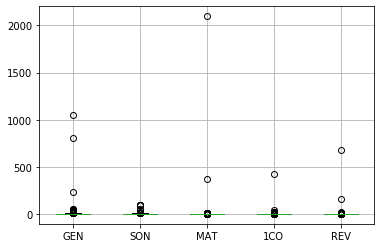

In [23]:
verses_features[sexual_categories+["bible_book"]].groupby(["bible_book"]).sum().T[["GEN", "SON", "MAT", "1CO", "REV"]].boxplot()

In [27]:
verses_features[sexual_categories].sum().sort_values()

body-function               0
ejaculation                 0
sexual-act-type             0
coitus-interruptus          0
anal-sex                    0
                        ...  
love                      113
positive-aspect           180
ascendant-descendant      253
places                  18219
groups                  45913
Length: 252, dtype: int64